In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/MNIST_test.csv")
data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
nan_data = data[data.isnull().any(axis=1)]
print(nan_data)

Empty DataFrame
Columns: [Unnamed: 0, index, labels, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, ...]
Index: []

[0 rows x 787 columns]


In [ ]:
x= data.to_numpy()
x

array([[   0,    0,    7, ...,    0,    0,    0],
       [   1,    1,    2, ...,    0,    0,    0],
       [   2,    2,    1, ...,    0,    0,    0],
       ...,
       [9997, 9997,    4, ...,    0,    0,    0],
       [9998, 9998,    5, ...,    0,    0,    0],
       [9999, 9999,    6, ...,    0,    0,    0]])

In [ ]:
y=x[:,2]
y

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y.shape

(10000,)

In [ ]:
K=set(y)

In [ ]:
K

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X=x[:,3:]

In [ ]:
X.shape

(10000, 784)

In [ ]:
X_test=X[1111]

In [ ]:
X_test_reshape=X_test.reshape(28,28)

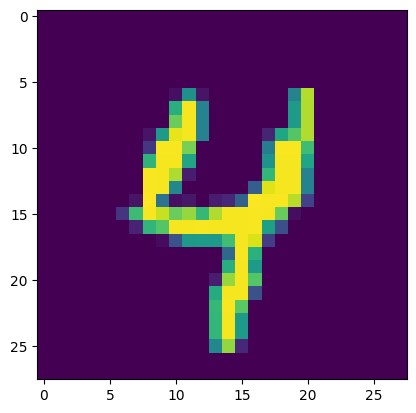

In [ ]:
plt.imshow(X_test_reshape)

In [ ]:
y[1111]

4

###Naive Bayes

In [ ]:
from scipy.stats import multivariate_normal as mvn

In [ ]:
class GaussNB():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors =dict()
    self.K =set(y.astype(int))

    for k in self.K:
      X_k = X[y==k]
      # Naive Assumption: Observations are linearly independent of each other
      self.likelihoods[k] ={"mean": X_k.mean(axis=0), "cov":X_k.var(axis=0)+epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N , D = X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k , l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"],allow_singular=True)+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [ ]:
gnb = GaussNB()

In [ ]:
gnb.fit(x,y)

In [ ]:
y_hat = gnb.predict(x)

In [ ]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [ ]:
accuracy(y,y_hat)

0.9167

###Non Naive Bayes

In [ ]:
class GaussBayes():
    def fit(self,X,y,epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))
        for k in self.K:
            X_k= X[y==k,:]
            N_k, D= X_k.shape
            mu_k = X_k.mean(axis=0)

            self.likelihoods[k] = {"mean":mu_k,"cov":(1/(N_k-1)*np.matmul((X_k-mu_k).T,(X_k-mu_k)))+epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)

    def predict(self,X):
        N,D = X.shape
        P_hat = np.zeros((N,len(self.K)))
        for k,l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"],allow_singular=True)+np.log(self.priors[k])
        return P_hat.argmax(axis=1)

In [ ]:
gaussB = GaussBayes()

In [ ]:
gaussB.fit(X,y)

In [ ]:
y_hat_bayes = gaussB.predict(X)

In [ ]:
accuracy(y,y_hat_bayes)

0.9675

###KNN

In [ ]:
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y
    def predict(self,X,K,epsilon=1e-3):
        N=len(X)
        y_hat = np.zeros(N)
        for i in range(N):
            dist2 = np.sum(((self.X-X[i])**2),axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
            y_hat[i]=np.bincount(self.y[idxt].astype(int),weights = gamma_k).argmax()
        return y_hat

In [ ]:
knn = KNNClassifier()

In [ ]:
knn.fit(X,y)

In [ ]:
y_hat = knn.predict(X,3)

In [ ]:
accuracy(y,y_hat)

1.0